In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time

In [2]:
link = pd.read_csv("links.csv")
movie = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")

In [46]:
#What is the shape of "movies.csv"?
movie.shape

(9742, 3)

In [47]:
#What is the shape of "ratings.csv"?
rating.shape

(100836, 4)

In [48]:
#How many unique "userId" are available in "ratings.csv"?
rating['userId'].nunique()

610

In [6]:
# Merging link and movie on 'movieId'
merged_table = pd.merge(link, movie, on='movieId')

# Merging the result with rating on 'movieId'
merged_table = pd.merge(merged_table, rating, on='movieId')

# Merging the result with tag on 'movieId'
merged_table = pd.merge(merged_table, tag, on='movieId')


In [7]:
merged_table

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,3778644,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [8]:
import pickle
with open('imdb.pkl','wb') as f:
        pickle.dump(merged_table,f)

In [9]:
with open('imdb.pkl','rb') as f:
    df=pickle.load(f)

In [10]:
df

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,3778644,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [11]:
movie_rating_counts = df.groupby('title')['userId_x'].nunique()


In [12]:
movie_rating_counts 

title
(500) Days of Summer (2009)          42
...And Justice for All (1979)         3
10 Cloverfield Lane (2016)           14
10 Things I Hate About You (1999)    54
101 Dalmatians (1996)                47
                                     ..
Zero Dark Thirty (2012)              14
Zombieland (2009)                    53
Zoolander (2001)                     54
Zulu (1964)                           4
eXistenZ (1999)                      22
Name: userId_x, Length: 1554, dtype: int64

In [13]:
df.groupby(['userId_x','rating'])['title'].max().sort_values(ascending=False)

userId_x  rating
560       4.0                                         eXistenZ (1999)
182       4.5                                         eXistenZ (1999)
603       5.0                                         eXistenZ (1999)
477       3.5                                         eXistenZ (1999)
312       4.0                                         eXistenZ (1999)
                                          ...                        
178       1.5       101 Dalmatians (One Hundred and One Dalmatians...
301       2.0       101 Dalmatians (One Hundred and One Dalmatians...
538       3.5                       10 Things I Hate About You (1999)
575       2.0                       10 Things I Hate About You (1999)
125       1.0                             (500) Days of Summer (2009)
Name: title, Length: 3514, dtype: object

In [16]:
df.groupby('title')['rating'].max().sort_values(ascending=False)

title
(500) Days of Summer (2009)                          5.0
Name of the Rose, The (Name der Rose, Der) (1986)    5.0
Mystery Science Theater 3000: The Movie (1996)       5.0
Mystery Men (1999)                                   5.0
My Stepmother Is an Alien (1988)                     5.0
                                                    ... 
Poltergeist II: The Other Side (1986)                2.0
Oh, God! Book II (1980)                              1.5
Losin' It (1983)                                     1.0
My Demon Lover (1987)                                1.0
Begotten (1990)                                      0.5
Name: rating, Length: 1554, dtype: float64

In [49]:
#Which movie has recieved maximum number of user ratings?
df.groupby('title')['userId_x'].count().idxmax()

'Pulp Fiction (1994)'

In [18]:
ratings_count = df.groupby('movieId')['rating'].count()

In [19]:
ratings_count

movieId
1         645
2         440
3         104
5          98
7          54
         ... 
183611      3
184471     12
187593     36
187595     10
193565      4
Name: rating, Length: 1554, dtype: int64

In [20]:
max_ratings_movie = ratings_count.idxmax()

In [21]:
max_ratings_movie 

296

In [50]:
#Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

matrix_tags = df.loc[df['title'] == 'Matrix, The (1999)', 'tag']


In [51]:
matrix_tags.nunique()

5

In [52]:
matrix_tags

142140          martial arts
142141                sci-fi
142142    alternate universe
142143            philosophy
142144      post apocalyptic
                 ...        
143525          martial arts
143526                sci-fi
143527    alternate universe
143528            philosophy
143529      post apocalyptic
Name: tag, Length: 1390, dtype: object

In [25]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

t2_ratings = df.loc[df['title'] == 'Terminator 2: Judgment Day (1991)', 'rating']

# Calculating the average rating
avg_rating = t2_ratings.mean()


In [26]:
avg_rating

3.970982142857143

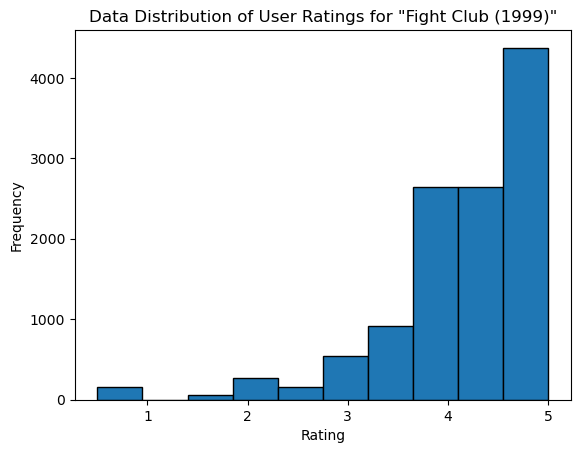

In [53]:
#How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

# Filter the DataFrame to include only the ratings for "Fight Club (1999)"
FC = df.loc[df['title'] == 'Fight Club (1999)', 'rating']

# Plot the data distribution
plt.hist(FC , bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Data Distribution of User Ratings for "Fight Club (1999)"')
plt.show()

## Left-skewed distribution

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.


In [28]:
# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
movie_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()


In [29]:
movie_ratings

,movieId,count,mean
0,1,645,3.920930
1,2,440,3.431818
2,3,104,3.259615
3,5,98,3.071429
4,7,54,3.185185
...,...,...,...
1549,183611,3,4.000000
1550,184471,12,2.500000
1551,187593,36,3.875000
1552,187595,10,3.900000


In [30]:
# Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(movie, movie_ratings, on='movieId', how='inner')

In [31]:
merged_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror,3,4.000000
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy,12,2.500000
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,36,3.875000
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,10,3.900000


In [32]:
# Filter only those movies which have more than 50 user ratings (i.e. > 50)
popular_movies = merged_df[merged_df['count'] > 50]


In [33]:
popular_movies

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
1525,148626,"Big Short, The (2015)",Drama,78,3.961538
1536,164179,Arrival (2016),Sci-Fi,182,3.980769
1539,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,56,4.142857
1540,168252,Logan (2017),Action|Sci-Fi,125,4.280000


In [34]:
#Which movie is the most popular based on  average user ratings?

most_popular_movie = popular_movies.loc[popular_movies['mean'].idxmax(), 'title']

In [35]:
most_popular_movie

'Shawshank Redemption, The (1994)'

In [36]:
merged_df

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429
4,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror,3,4.000000
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy,12,2.500000
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,36,3.875000
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,10,3.900000


In [38]:
#Which Sci-Fi movie is "third most popular" based on the number of user ratings?


# Filter the DataFrame to include only the Sci-Fi movies
scifi_movies = df[df['genres'].str.contains('Sci-Fi')]

# Group the user ratings based on movieId and applying aggregation operations 
movie_ratings = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# inner join on dataframe
merged_df = pd.merge(scifi_movies, movie_ratings, on='movieId', how='inner')

# Sort the movies by number of user ratings in descending order
sorted_movies = merged_df.sort_values(by='count', ascending=False)

# Select the third most popular movie
third_most_popular_movie = sorted_movies.iloc[2]['title']

In [39]:
third_most_popular_movie

'Star Wars: Episode IV - A New Hope (1977)'

In [42]:
#write a python code for Mention the movieId of the movie which has the highest IMDB rating.

# Find the row with the highest IMDb rating
highest_rated_movie = df.loc[df['imdbId'].idxmax()]

print(f"The movieId of the movie with the highest IMDb rating is {highest_rated_movie['movieId']}.")

The movieId of the movie with the highest IMDb rating is 180031.


In [43]:
df.iloc[180031]

movieId                                                     4993
imdbId                                                    120737
tmdbId                                                     120.0
title          Lord of the Rings: The Fellowship of the Ring,...
genres                                         Adventure|Fantasy
userId_x                                                     112
rating                                                       5.0
timestamp_x                                           1442535783
userId_y                                                     424
tag                                                      fantasy
timestamp_y                                           1457901156
Name: 180031, dtype: object

In [44]:
#Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

# Filter the DataFrame to include only the Sci-Fi movies
scifi_movies = df[df['genres'].str.contains('Sci-Fi')]

# Find the row with the highest IMDb rating
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['imdbId'].idxmax()]

print(f"The movieId of the Sci-Fi movie with the highest IMDb rating is {highest_rated_scifi_movie['movieId']}.")

The movieId of the Sci-Fi movie with the highest IMDb rating is 187593.


In [45]:
df.iloc[187593]

movieId                        6502
imdbId                       289043
tmdbId                        170.0
title          28 Days Later (2002)
genres         Action|Horror|Sci-Fi
userId_x                        357
rating                          4.5
timestamp_x              1348610808
userId_y                        305
tag                         zombies
timestamp_y              1525274359
Name: 187593, dtype: object

In [ ]:
df